# Reptile

In [87]:
# %pip install tensorflow

## Importing Libraries

In [88]:
# import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, explained_variance_score, mean_absolute_percentage_error
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [89]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow info messages


## Loading Data

In [90]:
df = pd.read_csv('../22_HP/outputs/simulation_results_not.csv')

In [91]:
df = df.drop(columns = ['delay_LH_NodeA', 'delay_HL_NodeA'], axis=1)

In [92]:
df

,Vin,temp,pvdd,cqload,lmin,wmin,toxe_n,toxm_n,toxref_n,toxe_p,toxm_p,toxref_p,toxp_par,xj_n,xj_p,ndep_n,ndep_p,leakage
0,0.0,43.786431,1.049654,1.992558e-16,4.422860e-08,4.335549e-08,8.858098e-10,9.149308e-10,8.800085e-10,9.382331e-10,9.149568e-10,9.596845e-10,6.400032e-10,1.438907e-08,1.434486e-08,6.530156e+18,2.751990e+18,1.763446e-09
1,1.0,43.786431,1.049654,1.992558e-16,4.422860e-08,4.335549e-08,8.858098e-10,9.149308e-10,8.800085e-10,9.382331e-10,9.149568e-10,9.596845e-10,6.400032e-10,1.438907e-08,1.434486e-08,6.530156e+18,2.751990e+18,2.040866e-09
2,0.0,73.734086,0.936041,1.703362e-15,4.468047e-08,4.295989e-08,8.966653e-10,9.579161e-10,8.894931e-10,9.051161e-10,8.974949e-10,9.112459e-10,6.536598e-10,1.335243e-08,1.435760e-08,6.696820e+18,2.698271e+18,6.515569e-10
3,1.0,73.734086,0.936041,1.703362e-15,4.468047e-08,4.295989e-08,8.966653e-10,9.579161e-10,8.894931e-10,9.051161e-10,8.974949e-10,9.112459e-10,6.536598e-10,1.335243e-08,1.435760e-08,6.696820e+18,2.698271e+18,1.886352e-09
4,0.0,53.497408,0.977805,2.900497e-15,4.542734e-08,4.700461e-08,8.951004e-10,9.207174e-10,8.560222e-10,9.582987e-10,9.510320e-10,9.448349e-10,6.471342e-10,1.439416e-08,1.428137e-08,6.482726e+18,2.732484e+18,5.722719e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.0,81.517314,0.989291,1.079963e-15,4.737492e-08,4.576390e-08,9.024798e-10,8.716992e-10,8.717394e-10,9.042821e-10,9.679145e-10,8.903566e-10,6.401357e-10,1.417753e-08,1.408925e-08,6.055804e+18,2.983100e+18,1.999215e-09
19996,0.0,-50.718263,0.972025,2.675348e-15,4.308545e-08,4.571994e-08,9.087048e-10,8.717162e-10,9.293734e-10,9.071626e-10,8.870402e-10,8.568218e-10,6.378137e-10,1.345592e-08,1.464451e-08,6.590675e+18,2.836970e+18,1.429586e-10
19997,1.0,-50.718263,0.972025,2.675348e-15,4.308545e-08,4.571994e-08,9.087048e-10,8.717162e-10,9.293734e-10,9.071626e-10,8.870402e-10,8.568218e-10,6.378137e-10,1.345592e-08,1.464451e-08,6.590675e+18,2.836970e+18,1.255025e-09
19998,0.0,91.443514,1.025177,3.572204e-15,4.552864e-08,4.697390e-08,9.045228e-10,8.774425e-10,8.855997e-10,9.384903e-10,9.221000e-10,9.031884e-10,6.682387e-10,1.456677e-08,1.477978e-08,6.233399e+18,2.980221e+18,2.194838e-09


In [93]:
# Normalize data
scaler = StandardScaler()

In [94]:
x = df.drop('leakage', axis=1)
x.shape

(20000, 17)

In [95]:
x = scaler.fit_transform(x.values)
print(x[0])

[-1.          0.18078805  0.86864689 -1.61154477 -0.5423984  -1.1100848
 -0.48642597  0.5056319  -0.67856217  0.59256723 -0.1722708   1.26269638
 -0.46089947  0.84367392  0.72033654  0.14908407 -0.5150728 ]


In [96]:
y = pd.DataFrame(df['leakage'])
y = scaler.fit_transform(y.values.reshape(-1, 1) )
y.shape

(20000, 1)

In [97]:
print(y[0])

[-0.04065403]


First, let's reset the tensorflow graph,

In [98]:
tf.compat.v1.reset_default_graph()

Initialize network parameters,

In [99]:
num_hidden = 64

In [100]:
num_classes = 1
num_feature = x.shape[1]

Next, we define the placeholders for our input and output,

In [101]:
X = tf.placeholder(tf.float32, shape=[None, num_feature])
Y = tf.placeholder(tf.float32, shape=[None, num_classes])

Randomly initialize our model parameters, 

In [102]:
w1 = tf.Variable(tf.random_uniform([num_feature, num_hidden]))
b1 = tf.Variable(tf.random_uniform([num_hidden]))

w2 = tf.Variable(tf.random_uniform([num_hidden, num_classes]))
b2 = tf.Variable(tf.random_uniform([num_classes]))

Perform feedforward operation to predict the output Yhat

In [103]:
#layer 1
z1 = tf.matmul(X, w1) + b1
a1 = tf.nn.tanh(z1)

#output layer
z2 = tf.matmul(a1, w2) + b2
Yhat = tf.nn.tanh(z2)

We use mean squared error as our loss function

In [104]:
loss_function = tf.reduce_mean(tf.square(Yhat - Y))

Minimize the loss using Adam Optimizer

In [105]:
optimizer = tf.train.AdamOptimizer(1e-2).minimize(loss_function)

Initialize tensorflow variables,

In [106]:
init = tf.global_variables_initializer()

## Single Hidden Layer

In [107]:
#number of epochs i.e training iterations
num_epochs = 50


#number of samples i.e number of shots
num_samples = 100 

#number of tasks
num_tasks = 5

#number of times we want to perform optimization
num_iterations = 10


#mini btach size
mini_batch = 20

epsilon = 0.1  # Reptile update factor

In [108]:
saver = tf.train.Saver()

In [109]:
losses = []
r2_scores = []
mae_scores = []
ev_scores = []
mape_scores = []

with tf.Session() as sess:
    sess.run(init)
    for e in range(1, num_epochs+1):
        # Reptile serial loop
        for reptile_iter in range(num_iterations):
            task_indices = np.random.choice(len(x), size=num_samples, replace=False)
            x_sample_task = x[task_indices]
            y_sample_task = y[task_indices]

            old_w1, old_b1, old_w2, old_b2 = sess.run([w1, b1, w2, b2])

            for _ in range(num_iterations):
                for i in range(0, num_samples, mini_batch):
                    x_minibatch = x_sample_task[i:i+mini_batch]
                    y_minibatch = y_sample_task[i:i+mini_batch]
                    sess.run(optimizer, feed_dict={X: x_minibatch, Y: y_minibatch})

            new_w1, new_b1, new_w2, new_b2 = sess.run([w1, b1, w2, b2])

            # Perform meta update
            updated_w1 = old_w1 + epsilon * (new_w1 - old_w1)
            updated_b1 = old_b1 + epsilon * (new_b1 - old_b1)
            updated_w2 = old_w2 + epsilon * (new_w2 - old_w2)
            updated_b2 = old_b2 + epsilon * (new_b2 - old_b2)

            # Update the model parameters with new parameters
            sess.run(w1.assign(updated_w1))
            sess.run(b1.assign(updated_b1))
            sess.run(w2.assign(updated_w2))
            sess.run(b2.assign(updated_b2))

        saver.save(sess, "model_1.ckpt")  
        loss = sess.run(loss_function, feed_dict={X: x_sample_task, Y: y_sample_task})
        losses.append(loss)
                
        # Calculate metrics
        y_pred = sess.run(Yhat, feed_dict={X: x_sample_task})
        r2 = r2_score(y_sample_task, y_pred)
        mae = mean_absolute_error(y_sample_task, y_pred)
        ev = explained_variance_score(y_sample_task, y_pred)
        mape = mean_absolute_percentage_error(y_sample_task, y_pred)

        r2_scores.append(r2)
        mae_scores.append(mae)
        ev_scores.append(ev)
        mape_scores.append(mape)

        if e % 10 == 0:
            print("Epoch {}: Loss {}, R2 Score {}  MAE {}, EV {}, MAPE {}\n".format(e, loss, r2, mae, ev, mape))
            print('---------------------------------\n')

Epoch 10: Loss 0.6228539347648621, R2 Score 0.19345353364184725  MAE 0.6287338210445853, EV 0.19964699337199576, MAPE 9.428930662996844

---------------------------------

Epoch 20: Loss 0.6410698890686035, R2 Score 0.5549578280529759  MAE 0.38360758501427483, EV 0.5710777425756423, MAPE 1.057033462984115

---------------------------------

Epoch 30: Loss 1.103916883468628, R2 Score 0.449658688019151  MAE 0.3623398030794243, EV 0.48309656274841983, MAPE 0.849159680202555

---------------------------------

Epoch 40: Loss 0.2323707640171051, R2 Score 0.7375047754352356  MAE 0.20111877128082473, EV 0.7538322985787457, MAPE 0.6301950763350386

---------------------------------

Epoch 50: Loss 0.08427000790834427, R2 Score 0.8545900122190208  MAE 0.13563215876434212, EV 0.856924204742282, MAPE 0.6360911075609427

---------------------------------



In [110]:
with tf.Session() as sess:
    # Restore the saved model
    saver.restore(sess, "model_1.ckpt")

    # Perform inference to get predictions
    y_preds = sess.run(Yhat, feed_dict={X: x})

# y_preds now contains the predicted values for the input x
print(y_preds)

INFO:tensorflow:Restoring parameters from model_1.ckpt
[[ 0.11961354]
 [ 0.09628651]
 [-0.79769117]
 ...
 [-0.3285557 ]
 [ 0.47712368]
 [ 0.15575804]]


In [112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_true = y
# Calculate evaluation metrics
mse = mean_squared_error(y_true, y_preds)
rmse = mean_squared_error(y_true, y_preds, squared=False)
mae = mean_absolute_error(y_true, y_preds)
r2 = r2_score(y_true, y_preds)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 0.341468939110422
Root Mean Squared Error (RMSE): 0.5843534368089418
Mean Absolute Error (MAE): 0.2035461049986994
R-squared (R2) Score: 0.658531060889578


In [116]:
r2 = r2_score(y_true, scaler.fit_transform(y_preds.reshape(-1, 1)))
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.6787436146339139


### XOR

In [118]:
df = pd.read_csv('../22_HP/outputs/simulation_results_xor.csv')
# df = df.drop(columns = ['delay_LH_NodeA', 'delay_HL_NodeA'], axis=1)
df
# Normalize data
scaler = StandardScaler()
x = df.drop('leakage', axis=1)
x.shape
x = scaler.fit_transform(x.values)
print(x[0])
y = pd.DataFrame(df['leakage'])
y = scaler.fit_transform(y.values.reshape(-1, 1) )
y.shape
print(y[0])

tf.compat.v1.reset_default_graph()

num_hidden = 64
num_classes = 1
num_feature = x.shape[1]

X = tf.placeholder(tf.float32, shape=[None, num_feature])
Y = tf.placeholder(tf.float32, shape=[None, num_classes])

w1 = tf.Variable(tf.random_uniform([num_feature, num_hidden]))
b1 = tf.Variable(tf.random_uniform([num_hidden]))

w2 = tf.Variable(tf.random_uniform([num_hidden, num_classes]))
b2 = tf.Variable(tf.random_uniform([num_classes]))

#layer 1
z1 = tf.matmul(X, w1) + b1
a1 = tf.nn.tanh(z1)

#output layer
z2 = tf.matmul(a1, w2) + b2
Yhat = tf.nn.tanh(z2)

loss_function = tf.reduce_mean(tf.square(Yhat - Y))

optimizer = tf.train.AdamOptimizer(1e-2).minimize(loss_function)

init = tf.global_variables_initializer()
## Single Hidden Layer
#number of epochs i.e training iterations
num_epochs = 50


#number of samples i.e number of shots
num_samples = 100 

#number of tasks
num_tasks = 5

#number of times we want to perform optimization
num_iterations = 10


#mini btach size
mini_batch = 20

epsilon = 0.1  # Reptile update factor
saver = tf.train.Saver()
losses = []
r2_scores = []
mae_scores = []
ev_scores = []
mape_scores = []

with tf.Session() as sess:
    sess.run(init)
    for e in range(1, num_epochs+1):
        # Reptile serial loop
        for reptile_iter in range(num_iterations):
            task_indices = np.random.choice(len(x), size=num_samples, replace=False)
            x_sample_task = x[task_indices]
            y_sample_task = y[task_indices]

            old_w1, old_b1, old_w2, old_b2 = sess.run([w1, b1, w2, b2])

            for _ in range(num_iterations):
                for i in range(0, num_samples, mini_batch):
                    x_minibatch = x_sample_task[i:i+mini_batch]
                    y_minibatch = y_sample_task[i:i+mini_batch]
                    sess.run(optimizer, feed_dict={X: x_minibatch, Y: y_minibatch})

            new_w1, new_b1, new_w2, new_b2 = sess.run([w1, b1, w2, b2])

            # Perform meta update
            updated_w1 = old_w1 + epsilon * (new_w1 - old_w1)
            updated_b1 = old_b1 + epsilon * (new_b1 - old_b1)
            updated_w2 = old_w2 + epsilon * (new_w2 - old_w2)
            updated_b2 = old_b2 + epsilon * (new_b2 - old_b2)

            # Update the model parameters with new parameters
            sess.run(w1.assign(updated_w1))
            sess.run(b1.assign(updated_b1))
            sess.run(w2.assign(updated_w2))
            sess.run(b2.assign(updated_b2))

        saver.save(sess, "model_xor.ckpt")  
        loss = sess.run(loss_function, feed_dict={X: x_sample_task, Y: y_sample_task})
        losses.append(loss)
                
        # Calculate metrics
        y_pred = sess.run(Yhat, feed_dict={X: x_sample_task})
        r2 = r2_score(y_sample_task, y_pred)
        mae = mean_absolute_error(y_sample_task, y_pred)
        ev = explained_variance_score(y_sample_task, y_pred)
        mape = mean_absolute_percentage_error(y_sample_task, y_pred)

        r2_scores.append(r2)
        mae_scores.append(mae)
        ev_scores.append(ev)
        mape_scores.append(mape)

        if e % 10 == 0:
            print("Epoch {}: Loss {}, R2 Score {}  MAE {}, EV {}, MAPE {}\n".format(e, loss, r2, mae, ev, mape))
            print('---------------------------------\n')
with tf.Session() as sess:
    # Restore the saved model
    saver.restore(sess, "model_xor.ckpt")

    # Perform inference to get predictions
    y_preds = sess.run(Yhat, feed_dict={X: x})

# y_preds now contains the predicted values for the input x
print(y_preds)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_true = y
# Calculate evaluation metrics
mse = mean_squared_error(y_true, y_preds)
rmse = mean_squared_error(y_true, y_preds, squared=False)
mae = mean_absolute_error(y_true, y_preds)
r2 = r2_score(y_true, y_preds)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


[-1.         -1.          0.18078805  0.86864689 -1.61154477 -0.5423984
 -1.1100848  -0.48642597  0.5056319  -0.67856217  0.59256723 -0.1722708
  1.26269638 -0.46089947  0.84367392  0.72033654  0.14908407 -0.5150728 ]
[0.25635847]
Epoch 10: Loss 0.5395217537879944, R2 Score 0.4682183698684561  MAE 0.5638284368429235, EV 0.4891127372086358, MAPE 3.1682866830050984

---------------------------------

Epoch 20: Loss 0.5234146118164062, R2 Score 0.560091717674186  MAE 0.40972984275749363, EV 0.5811913922176221, MAPE 0.7856005055429052

---------------------------------

Epoch 30: Loss 0.1762954592704773, R2 Score 0.7609402317797743  MAE 0.23796239230992555, EV 0.7680143066311369, MAPE 0.9546303998219655

---------------------------------

Epoch 40: Loss 0.7604233026504517, R2 Score 0.5147048306681716  MAE 0.33789700538744866, EV 0.5443977264181123, MAPE 0.8274792145573009

---------------------------------

Epoch 50: Loss 0.8298800587654114, R2 Score 0.5420880677135154  MAE 0.3437875023256

### NAND

In [119]:
df = pd.read_csv('../22_HP/outputs/simulation_results_nand.csv')
df = df.drop(columns = ['delay_LH_NodeA', 'delay_HL_NodeA'], axis=1)
df
# Normalize data
scaler = StandardScaler()
x = df.drop('leakage', axis=1)
x.shape
x = scaler.fit_transform(x.values)
print(x[0])
y = pd.DataFrame(df['leakage'])
y = scaler.fit_transform(y.values.reshape(-1, 1) )
y.shape
print(y[0])

tf.compat.v1.reset_default_graph()

num_hidden = 64
num_classes = 1
num_feature = x.shape[1]

X = tf.placeholder(tf.float32, shape=[None, num_feature])
Y = tf.placeholder(tf.float32, shape=[None, num_classes])

w1 = tf.Variable(tf.random_uniform([num_feature, num_hidden]))
b1 = tf.Variable(tf.random_uniform([num_hidden]))

w2 = tf.Variable(tf.random_uniform([num_hidden, num_classes]))
b2 = tf.Variable(tf.random_uniform([num_classes]))

#layer 1
z1 = tf.matmul(X, w1) + b1
a1 = tf.nn.tanh(z1)

#output layer
z2 = tf.matmul(a1, w2) + b2
Yhat = tf.nn.tanh(z2)

loss_function = tf.reduce_mean(tf.square(Yhat - Y))

optimizer = tf.train.AdamOptimizer(1e-2).minimize(loss_function)

init = tf.global_variables_initializer()
## Single Hidden Layer
#number of epochs i.e training iterations
num_epochs = 50


#number of samples i.e number of shots
num_samples = 100 

#number of tasks
num_tasks = 5

#number of times we want to perform optimization
num_iterations = 10


#mini btach size
mini_batch = 20

epsilon = 0.1  # Reptile update factor
saver = tf.train.Saver()
losses = []
r2_scores = []
mae_scores = []
ev_scores = []
mape_scores = []

with tf.Session() as sess:
    sess.run(init)
    for e in range(1, num_epochs+1):
        # Reptile serial loop
        for reptile_iter in range(num_iterations):
            task_indices = np.random.choice(len(x), size=num_samples, replace=False)
            x_sample_task = x[task_indices]
            y_sample_task = y[task_indices]

            old_w1, old_b1, old_w2, old_b2 = sess.run([w1, b1, w2, b2])

            for _ in range(num_iterations):
                for i in range(0, num_samples, mini_batch):
                    x_minibatch = x_sample_task[i:i+mini_batch]
                    y_minibatch = y_sample_task[i:i+mini_batch]
                    sess.run(optimizer, feed_dict={X: x_minibatch, Y: y_minibatch})

            new_w1, new_b1, new_w2, new_b2 = sess.run([w1, b1, w2, b2])

            # Perform meta update
            updated_w1 = old_w1 + epsilon * (new_w1 - old_w1)
            updated_b1 = old_b1 + epsilon * (new_b1 - old_b1)
            updated_w2 = old_w2 + epsilon * (new_w2 - old_w2)
            updated_b2 = old_b2 + epsilon * (new_b2 - old_b2)

            # Update the model parameters with new parameters
            sess.run(w1.assign(updated_w1))
            sess.run(b1.assign(updated_b1))
            sess.run(w2.assign(updated_w2))
            sess.run(b2.assign(updated_b2))

        saver.save(sess, "model_nand.ckpt")  
        loss = sess.run(loss_function, feed_dict={X: x_sample_task, Y: y_sample_task})
        losses.append(loss)
                
        # Calculate metrics
        y_pred = sess.run(Yhat, feed_dict={X: x_sample_task})
        r2 = r2_score(y_sample_task, y_pred)
        mae = mean_absolute_error(y_sample_task, y_pred)
        ev = explained_variance_score(y_sample_task, y_pred)
        mape = mean_absolute_percentage_error(y_sample_task, y_pred)

        r2_scores.append(r2)
        mae_scores.append(mae)
        ev_scores.append(ev)
        mape_scores.append(mape)

        if e % 10 == 0:
            print("Epoch {}: Loss {}, R2 Score {}  MAE {}, EV {}, MAPE {}\n".format(e, loss, r2, mae, ev, mape))
            print('---------------------------------\n')
with tf.Session() as sess:
    # Restore the saved model
    saver.restore(sess, "model_nand.ckpt")

    # Perform inference to get predictions
    y_preds = sess.run(Yhat, feed_dict={X: x})

# y_preds now contains the predicted values for the input x
print(y_preds)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_true = y
# Calculate evaluation metrics
mse = mean_squared_error(y_true, y_preds)
rmse = mean_squared_error(y_true, y_preds, squared=False)
mae = mean_absolute_error(y_true, y_preds)
r2 = r2_score(y_true, y_preds)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


[-1.         -1.          0.18078805  0.86864689 -1.61154477 -0.5423984
 -1.1100848  -0.48642597  0.5056319  -0.67856217  0.59256723 -0.1722708
  1.26269638 -0.46089947  0.84367392  0.72033654  0.14908407 -0.5150728
 -0.86819815 -1.00270921]
[-0.32330694]
Epoch 10: Loss 0.6167251467704773, R2 Score 0.4030940774537696  MAE 0.5577516706698634, EV 0.4039186208188661, MAPE 2.6855845497402964

---------------------------------

Epoch 20: Loss 0.28504490852355957, R2 Score 0.6141984682535486  MAE 0.38209427240779725, EV 0.6179341504831729, MAPE 6.6337655557507365

---------------------------------

Epoch 30: Loss 0.18251939117908478, R2 Score 0.7672846262560089  MAE 0.27192192295421863, EV 0.7707126710546549, MAPE 8.388681222807117

---------------------------------

Epoch 40: Loss 0.0544024221599102, R2 Score 0.8890867686917132  MAE 0.15071402567597128, EV 0.8894634757277188, MAPE 1.5981890549238937

---------------------------------

Epoch 50: Loss 0.21027381718158722, R2 Score 0.789210902

### NOR

In [120]:
df = pd.read_csv('../22_HP/outputs/simulation_results_nor.csv')
df = df.drop(columns = ['delay_LH_NodeA', 'delay_HL_NodeA'], axis=1)
df
# Normalize data
scaler = StandardScaler()
x = df.drop('leakage', axis=1)
x.shape
x = scaler.fit_transform(x.values)
print(x[0])
y = pd.DataFrame(df['leakage'])
y = scaler.fit_transform(y.values.reshape(-1, 1) )
y.shape
print(y[0])

tf.compat.v1.reset_default_graph()

num_hidden = 64
num_classes = 1
num_feature = x.shape[1]

X = tf.placeholder(tf.float32, shape=[None, num_feature])
Y = tf.placeholder(tf.float32, shape=[None, num_classes])

w1 = tf.Variable(tf.random_uniform([num_feature, num_hidden]))
b1 = tf.Variable(tf.random_uniform([num_hidden]))

w2 = tf.Variable(tf.random_uniform([num_hidden, num_classes]))
b2 = tf.Variable(tf.random_uniform([num_classes]))

#layer 1
z1 = tf.matmul(X, w1) + b1
a1 = tf.nn.tanh(z1)

#output layer
z2 = tf.matmul(a1, w2) + b2
Yhat = tf.nn.tanh(z2)

loss_function = tf.reduce_mean(tf.square(Yhat - Y))

optimizer = tf.train.AdamOptimizer(1e-2).minimize(loss_function)

init = tf.global_variables_initializer()
## Single Hidden Layer
#number of epochs i.e training iterations
num_epochs = 50


#number of samples i.e number of shots
num_samples = 100 

#number of tasks
num_tasks = 5

#number of times we want to perform optimization
num_iterations = 10


#mini btach size
mini_batch = 20

epsilon = 0.1  # Reptile update factor
saver = tf.train.Saver()
losses = []
r2_scores = []
mae_scores = []
ev_scores = []
mape_scores = []

with tf.Session() as sess:
    sess.run(init)
    for e in range(1, num_epochs+1):
        # Reptile serial loop
        for reptile_iter in range(num_iterations):
            task_indices = np.random.choice(len(x), size=num_samples, replace=False)
            x_sample_task = x[task_indices]
            y_sample_task = y[task_indices]

            old_w1, old_b1, old_w2, old_b2 = sess.run([w1, b1, w2, b2])

            for _ in range(num_iterations):
                for i in range(0, num_samples, mini_batch):
                    x_minibatch = x_sample_task[i:i+mini_batch]
                    y_minibatch = y_sample_task[i:i+mini_batch]
                    sess.run(optimizer, feed_dict={X: x_minibatch, Y: y_minibatch})

            new_w1, new_b1, new_w2, new_b2 = sess.run([w1, b1, w2, b2])

            # Perform meta update
            updated_w1 = old_w1 + epsilon * (new_w1 - old_w1)
            updated_b1 = old_b1 + epsilon * (new_b1 - old_b1)
            updated_w2 = old_w2 + epsilon * (new_w2 - old_w2)
            updated_b2 = old_b2 + epsilon * (new_b2 - old_b2)

            # Update the model parameters with new parameters
            sess.run(w1.assign(updated_w1))
            sess.run(b1.assign(updated_b1))
            sess.run(w2.assign(updated_w2))
            sess.run(b2.assign(updated_b2))

        saver.save(sess, "model_nor.ckpt")  
        loss = sess.run(loss_function, feed_dict={X: x_sample_task, Y: y_sample_task})
        losses.append(loss)
                
        # Calculate metrics
        y_pred = sess.run(Yhat, feed_dict={X: x_sample_task})
        r2 = r2_score(y_sample_task, y_pred)
        mae = mean_absolute_error(y_sample_task, y_pred)
        ev = explained_variance_score(y_sample_task, y_pred)
        mape = mean_absolute_percentage_error(y_sample_task, y_pred)

        r2_scores.append(r2)
        mae_scores.append(mae)
        ev_scores.append(ev)
        mape_scores.append(mape)

        if e % 10 == 0:
            print("Epoch {}: Loss {}, R2 Score {}  MAE {}, EV {}, MAPE {}\n".format(e, loss, r2, mae, ev, mape))
            print('---------------------------------\n')
with tf.Session() as sess:
    # Restore the saved model
    saver.restore(sess, "model_nor.ckpt")

    # Perform inference to get predictions
    y_preds = sess.run(Yhat, feed_dict={X: x})

# y_preds now contains the predicted values for the input x
print(y_preds)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_true = y
# Calculate evaluation metrics
mse = mean_squared_error(y_true, y_preds)
rmse = mean_squared_error(y_true, y_preds, squared=False)
mae = mean_absolute_error(y_true, y_preds)
r2 = r2_score(y_true, y_preds)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


[-1.         -1.          0.18078805  0.86864689 -1.61154477 -0.5423984
 -1.1100848  -0.48642597  0.5056319  -0.67856217  0.59256723 -0.1722708
  1.26269638 -0.46089947  0.84367392  0.72033654  0.14908407 -0.5150728
 -0.85904179 -1.01221384]
[-0.18320721]
Epoch 10: Loss 0.4487653374671936, R2 Score 0.397247384138946  MAE 0.5141944385260362, EV 0.4033762893576709, MAPE 6.747874142936755

---------------------------------

Epoch 20: Loss 0.46941348910331726, R2 Score 0.5360874201311627  MAE 0.44559916836097335, EV 0.560028634647721, MAPE 1.6262386748268003

---------------------------------

Epoch 30: Loss 0.5853937268257141, R2 Score 0.4737993405176566  MAE 0.41048838311625424, EV 0.4826735104077773, MAPE 2.059567126031359

---------------------------------

Epoch 40: Loss 1.1806484460830688, R2 Score 0.43793441934547506  MAE 0.3951738013124991, EV 0.4589810654857126, MAPE 5.158940672448557

---------------------------------

Epoch 50: Loss 0.20948627591133118, R2 Score 0.75302067968173

### AND

In [121]:
df = pd.read_csv('../22_HP/outputs/simulation_results_and.csv')
# df = df.drop(columns = ['delay_LH_NodeA', 'delay_HL_NodeA'], axis=1)
df
# Normalize data
scaler = StandardScaler()
x = df.drop('leakage', axis=1)
x.shape
x = scaler.fit_transform(x.values)
print(x[0])
y = pd.DataFrame(df['leakage'])
y = scaler.fit_transform(y.values.reshape(-1, 1) )
y.shape
print(y[0])

tf.compat.v1.reset_default_graph()

num_hidden = 64
num_classes = 1
num_feature = x.shape[1]

X = tf.placeholder(tf.float32, shape=[None, num_feature])
Y = tf.placeholder(tf.float32, shape=[None, num_classes])

w1 = tf.Variable(tf.random_uniform([num_feature, num_hidden]))
b1 = tf.Variable(tf.random_uniform([num_hidden]))

w2 = tf.Variable(tf.random_uniform([num_hidden, num_classes]))
b2 = tf.Variable(tf.random_uniform([num_classes]))

#layer 1
z1 = tf.matmul(X, w1) + b1
a1 = tf.nn.tanh(z1)

#output layer
z2 = tf.matmul(a1, w2) + b2
Yhat = tf.nn.tanh(z2)

loss_function = tf.reduce_mean(tf.square(Yhat - Y))

optimizer = tf.train.AdamOptimizer(1e-2).minimize(loss_function)

init = tf.global_variables_initializer()
## Single Hidden Layer
#number of epochs i.e training iterations
num_epochs = 50


#number of samples i.e number of shots
num_samples = 100 

#number of tasks
num_tasks = 5

#number of times we want to perform optimization
num_iterations = 10


#mini btach size
mini_batch = 20

epsilon = 0.1  # Reptile update factor
saver = tf.train.Saver()
losses = []
r2_scores = []
mae_scores = []
ev_scores = []
mape_scores = []

with tf.Session() as sess:
    sess.run(init)
    for e in range(1, num_epochs+1):
        # Reptile serial loop
        for reptile_iter in range(num_iterations):
            task_indices = np.random.choice(len(x), size=num_samples, replace=False)
            x_sample_task = x[task_indices]
            y_sample_task = y[task_indices]

            old_w1, old_b1, old_w2, old_b2 = sess.run([w1, b1, w2, b2])

            for _ in range(num_iterations):
                for i in range(0, num_samples, mini_batch):
                    x_minibatch = x_sample_task[i:i+mini_batch]
                    y_minibatch = y_sample_task[i:i+mini_batch]
                    sess.run(optimizer, feed_dict={X: x_minibatch, Y: y_minibatch})

            new_w1, new_b1, new_w2, new_b2 = sess.run([w1, b1, w2, b2])

            # Perform meta update
            updated_w1 = old_w1 + epsilon * (new_w1 - old_w1)
            updated_b1 = old_b1 + epsilon * (new_b1 - old_b1)
            updated_w2 = old_w2 + epsilon * (new_w2 - old_w2)
            updated_b2 = old_b2 + epsilon * (new_b2 - old_b2)

            # Update the model parameters with new parameters
            sess.run(w1.assign(updated_w1))
            sess.run(b1.assign(updated_b1))
            sess.run(w2.assign(updated_w2))
            sess.run(b2.assign(updated_b2))

        saver.save(sess, "model_and.ckpt")  
        loss = sess.run(loss_function, feed_dict={X: x_sample_task, Y: y_sample_task})
        losses.append(loss)
                
        # Calculate metrics
        y_pred = sess.run(Yhat, feed_dict={X: x_sample_task})
        r2 = r2_score(y_sample_task, y_pred)
        mae = mean_absolute_error(y_sample_task, y_pred)
        ev = explained_variance_score(y_sample_task, y_pred)
        mape = mean_absolute_percentage_error(y_sample_task, y_pred)

        r2_scores.append(r2)
        mae_scores.append(mae)
        ev_scores.append(ev)
        mape_scores.append(mape)

        if e % 10 == 0:
            print("Epoch {}: Loss {}, R2 Score {}  MAE {}, EV {}, MAPE {}\n".format(e, loss, r2, mae, ev, mape))
            print('---------------------------------\n')
with tf.Session() as sess:
    # Restore the saved model
    saver.restore(sess, "model_and.ckpt")

    # Perform inference to get predictions
    y_preds = sess.run(Yhat, feed_dict={X: x})

# y_preds now contains the predicted values for the input x
print(y_preds)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_true = y
# Calculate evaluation metrics
mse = mean_squared_error(y_true, y_preds)
rmse = mean_squared_error(y_true, y_preds, squared=False)
mae = mean_absolute_error(y_true, y_preds)
r2 = r2_score(y_true, y_preds)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


[-1.         -1.         -1.          0.18078805  0.86864689 -1.61154477
 -0.5423984  -1.1100848  -0.48642597  0.5056319  -0.67856217  0.59256723
 -0.1722708   1.26269638 -0.46089947  0.84367392  0.72033654  0.14908407
 -0.5150728 ]
[-0.26593861]
Epoch 10: Loss 0.5545669198036194, R2 Score 0.4765904403282958  MAE 0.5523221551685193, EV 0.532614105209328, MAPE 2.4457176834489722

---------------------------------

Epoch 20: Loss 0.3205307126045227, R2 Score 0.653888665154224  MAE 0.3804134270289896, EV 0.6868032183171264, MAPE 1.5010947437829345

---------------------------------

Epoch 30: Loss 0.21456916630268097, R2 Score 0.7169805706938578  MAE 0.21817627794834185, EV 0.7216868014814828, MAPE 0.625579946820686

---------------------------------

Epoch 40: Loss 0.2129029631614685, R2 Score 0.7640032285273816  MAE 0.2331998041359222, EV 0.7788302897195067, MAPE 0.47308110967675565

---------------------------------

Epoch 50: Loss 0.20933109521865845, R2 Score 0.7754610815966121  MAE 

2024-05-07 15:06:31.354957: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20480000 exceeds 10% of free system memory.


### Visualizations

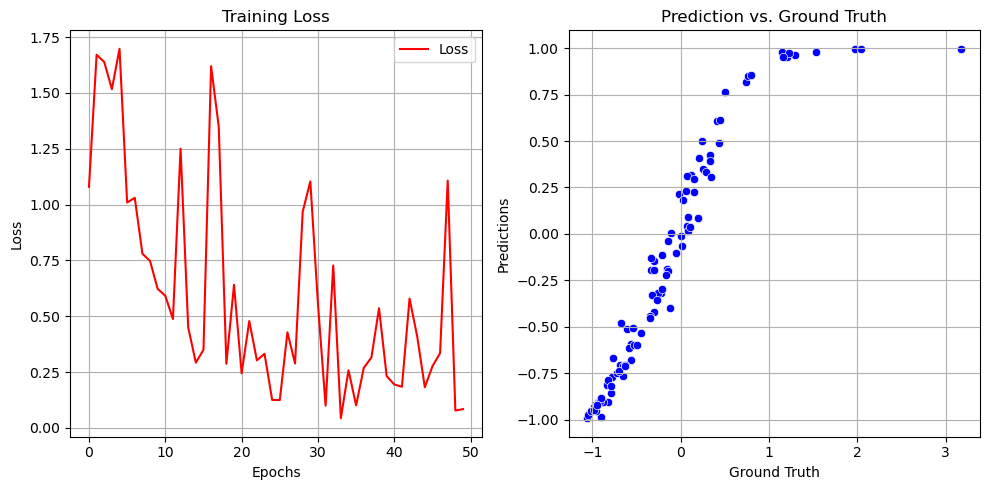

In [113]:
# Plot the training loop
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), losses, label='Loss', color='r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_sample_task.flatten(), y=y_pred.flatten(), color='b')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Prediction vs. Ground Truth')
plt.grid()
plt.tight_layout()
plt.show()


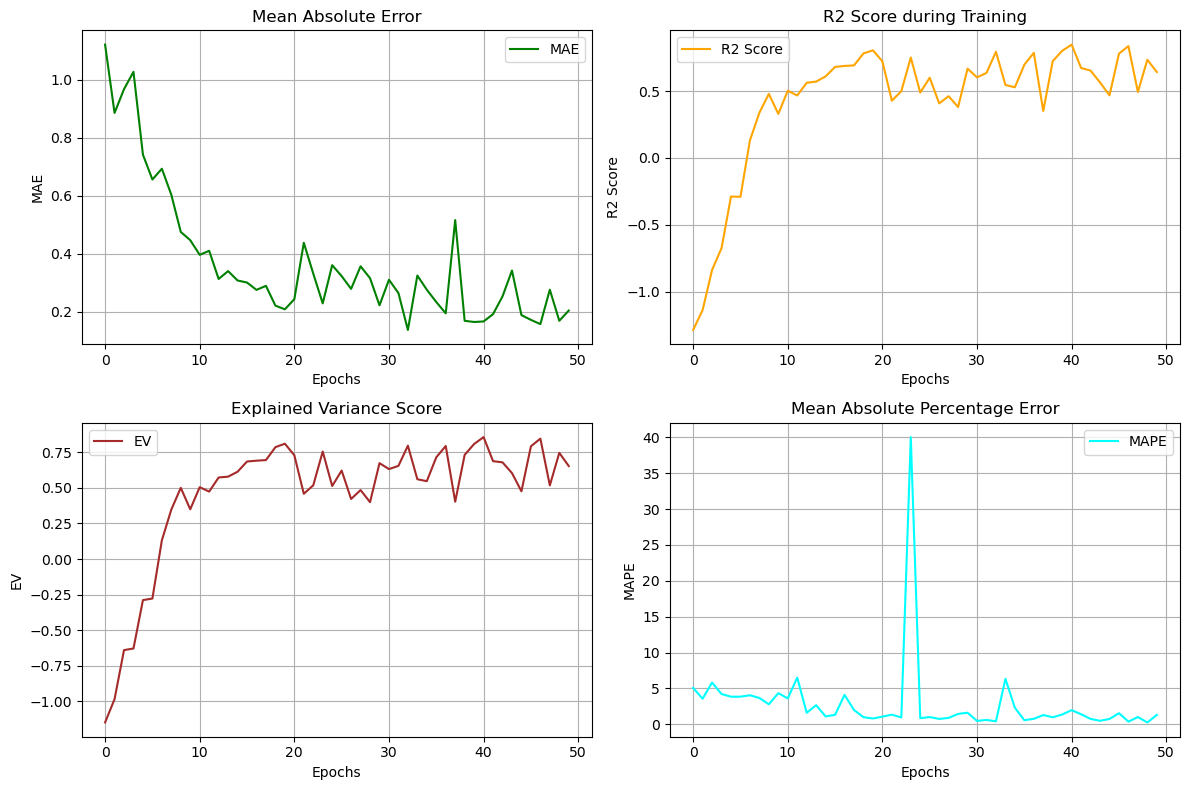

In [97]:
plt.figure(figsize=(12, 8))

# MAE
plt.subplot(2, 2, 1)
sns.lineplot(x=range(num_epochs), y=mae_scores, label='MAE', color='green')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Mean Absolute Error')
plt.grid()
plt.legend()

# R2
plt.subplot(2, 2, 2)
plt.plot(range(num_epochs), r2_scores, label='R2 Score', color='orange')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.title('R2 Score during Training')
plt.legend()
plt.grid()

# EV
plt.subplot(2, 2, 3)
sns.lineplot(x=range(num_epochs), y=ev_scores, label='EV', color='brown')
plt.xlabel('Epochs')
plt.ylabel('EV')
plt.title('Explained Variance Score')
plt.grid()
plt.legend()

# MAPE
plt.subplot(2, 2, 4)
sns.lineplot(x=range(num_epochs), y=mape_scores, label='MAPE', color='cyan')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.title('Mean Absolute Percentage Error')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


## 3 Hidden Layers

In [98]:

# Initialize network parameters
num_hidden_layers = 3
num_hidden_units = 64
num_classes = 1
num_feature = x.shape[1]

# Reset the tensorflow graph
tf.compat.v1.reset_default_graph()

# Define placeholders for input and output
X = tf.placeholder(tf.float32, shape=[None, num_feature])
Y = tf.placeholder(tf.float32, shape=[None, num_classes])

# Initialize model parameters for each layer
weights = [tf.Variable(tf.random_uniform([num_feature if i == 0 else num_hidden_units,
                                         num_hidden_units if i < num_hidden_layers else num_classes]))
           for i in range(num_hidden_layers + 1)]
biases = [tf.Variable(tf.random_uniform([num_hidden_units if i < num_hidden_layers else num_classes]))
          for i in range(num_hidden_layers + 1)]
# Perform feedforward operations for each layer
layer_outputs = [X]
for i in range(num_hidden_layers + 1):
    layer_input = layer_outputs[-1]
    layer_output = tf.matmul(layer_input, weights[i]) + biases[i]
    layer_output = tf.nn.tanh(layer_output) if i < num_hidden_layers else layer_output
    layer_outputs.append(layer_output)
# Output of the neural network
Yhat = layer_outputs[-1]

# Loss function and optimizer
loss_function = tf.reduce_mean(tf.square(Yhat - Y))
optimizer = tf.train.AdamOptimizer(1e-2).minimize(loss_function)

# Initialize tensorflow variables
init = tf.global_variables_initializer()

# Training parameters
num_epochs = 50
num_samples = 100
num_tasks = 5
num_iterations = 10
mini_batch = 20
epsilon = 0.1  # Reptile update factor

### Training Loop

In [100]:
# Initialize empty lists to store loss and R2 scores
losses = []
r2_scores = []
mae_scores = []
ev_scores = []
mape_scores = []

# Initialize phi (meta-parameters)
phi_init = None

# Number of reptile iterations
num_reptile_iterations = 10

# Training loop
with tf.Session() as sess:
    sess.run(init)
    
    for e in range(1, num_epochs+1):
        for _ in range(num_tasks):  # Iterate over a new set of tasks in each epoch
            task_indices = np.random.choice(len(x), size=num_samples, replace=False)
            x_sample_task = x[task_indices]
            y_sample_task = y[task_indices]

            # Reptile serial loop
            for reptile_iter in range(num_reptile_iterations):
                old_weights = sess.run(weights)
                old_biases = sess.run(biases)

                for _ in range(num_iterations):
                    for i in range(0, num_samples, mini_batch):
                        x_minibatch = x_sample_task[i:i+mini_batch]
                        y_minibatch = y_sample_task[i:i+mini_batch]
                        sess.run(optimizer, feed_dict={X: x_minibatch, Y: y_minibatch})

                new_weights = sess.run(weights)
                new_biases = sess.run(biases)

                # Perform meta update
                for i in range(len(weights)):
                    updated_weights = old_weights[i] + epsilon * (new_weights[i] - old_weights[i])
                    updated_biases = old_biases[i] + epsilon * (new_biases[i] - old_biases[i])
                    sess.run(weights[i].assign(updated_weights))
                    sess.run(biases[i].assign(updated_biases))

        # Compute loss and evaluation metrics
        loss = sess.run(loss_function, feed_dict={X: x_sample_task, Y: y_sample_task})
        losses.append(loss)

        y_pred = sess.run(Yhat, feed_dict={X: x_sample_task})
        r2 = r2_score(y_sample_task, y_pred)
        mae = mean_absolute_error(y_sample_task, y_pred)
        ev = explained_variance_score(y_sample_task, y_pred)
        mape = mean_absolute_percentage_error(y_sample_task, y_pred)

        r2_scores.append(r2)
        mae_scores.append(mae)
        ev_scores.append(ev)
        mape_scores.append(mape)

        if e % 10 == 0:
            print("Epoch {}: Loss {}, R2 Score {}  MAE {}, EV {}, MAPE {}\n".format(e, loss, r2, mae, ev, mape))
            print('---------------------------------\n')

In [ ]:
# Initialize network parameters
num_hidden_layers = 3
num_hidden_units = 64
num_classes = 1
num_feature = x.shape[1]

# Reset the tensorflow graph
tf.compat.v1.reset_default_graph()

# Define placeholders for input and output
X = tf.placeholder(tf.float32, shape=[None, num_feature])
Y = tf.placeholder(tf.float32, shape=[None, num_classes])

# Initialize model parameters for each layer
weights = [tf.Variable(tf.random_uniform([num_feature if i == 0 else num_hidden_units,
                                         num_hidden_units if i < num_hidden_layers else num_classes]))
           for i in range(num_hidden_layers + 1)]
biases = [tf.Variable(tf.random_uniform([num_hidden_units if i < num_hidden_layers else num_classes]))
          for i in range(num_hidden_layers + 1)]

In [ ]:
# Perform feedforward operations for each layer
layer_outputs = [X]
for i in range(num_hidden_layers + 1):
    layer_input = layer_outputs[-1]
    layer_output = tf.matmul(layer_input, weights[i]) + biases[i]
    layer_output = tf.nn.tanh(layer_output) if i < num_hidden_layers else layer_output
    layer_outputs.append(layer_output)

In [ ]:
# Output of the neural network
Yhat = layer_outputs[-1]

# Loss function and optimizer
loss_function = tf.reduce_mean(tf.square(Yhat - Y))
optimizer = tf.train.AdamOptimizer(1e-2).minimize(loss_function)

# Initialize tensorflow variables
init = tf.global_variables_initializer()

# Training parameters
num_epochs = 50
num_samples = 100
num_tasks = 5
num_iterations = 10
mini_batch = 20
epsilon = 0.1  # Reptile update factor

### Training Loop

In [ ]:
# Initialize empty lists to store loss and R2 scores
losses = []
r2_scores = []
r2_scores = []
mae_scores = []
ev_scores = []
mape_scores = []

# Initialize phi (meta-parameters)
phi_init = None

# Training loop
with tf.Session() as sess:
    sess.run(init)
    
    for e in range(1, num_epochs+1):
        for _ in range(num_tasks):  # Iterate over a new set of tasks in each epoch
            task_indices = np.random.choice(len(x), size=num_samples, replace=False)
            x_sample_task = x[task_indices]
            y_sample_task = y[task_indices]

            #get the initial parameters of the model
            if phi_init is not None:
                for i in range(len(weights)):
                    sess.run(weights[i].assign(phi_init[i]))
                    sess.run(biases[i].assign(phi_init[i]))
            
            
            # Randomly initialize weights (w) for each task
            weights_task = [tf.Variable(tf.random_uniform([num_feature if i == 0 else num_hidden_units,
                                                           num_hidden_units if i < num_hidden_layers else num_classes]))
                            for i in range(num_hidden_layers + 1)]
            biases_task = [tf.Variable(tf.random_uniform([num_hidden_units if i < num_hidden_layers else num_classes]))
                           for i in range(num_hidden_layers + 1)]
            sess.run(tf.variables_initializer(weights_task + biases_task))
            
            # Inner loop for gradient updates on tasks
            for k in range(num_iterations):
                for i in range(0, num_samples, mini_batch):
                    x_minibatch = x_sample_task[i:i+mini_batch]
                    y_minibatch = y_sample_task[i:i+mini_batch]
                    sess.run(optimizer, feed_dict={X: x_minibatch, Y: y_minibatch})
            
            # Get the updated weights (w) after SGD on the task
            w_updated = sess.run(weights_task + biases_task)
            
            # Update phi using Reptile update rule
            if phi_init is None:
                phi_init = w_updated  # Initialize phi on the first iteration
            else:
                for i in range(len(phi_init)):
                    phi_init[i] += epsilon * (w_updated[i] - phi_init[i])

        loss = sess.run(loss_function, feed_dict={X: x_sample_task, Y: y_sample_task})
        losses.append(loss)
      
        y_pred = sess.run(Yhat, feed_dict={X: x_sample_task})
        r2 = r2_score(y_sample_task, y_pred)
        mae = mean_absolute_error(y_sample_task, y_pred)
        ev = explained_variance_score(y_sample_task, y_pred)
        mape = mean_absolute_percentage_error(y_sample_task, y_pred)

        r2_scores.append(r2)
        mae_scores.append(mae)
        ev_scores.append(ev)
        mape_scores.append(mape)
        
        if e % 10 == 0:
            print("Epoch {}: Loss {}, R2 Score {}  MAE {}, EV {}, MAPE {}\n".format(e, loss, r2, mae, ev, mape))
            print('---------------------------------\n')

In [15]:
task_indices = np.random.choice(len(x), size=num_samples, replace=False)

In [ ]:
# Initialize empty lists to store loss and R2 scores
losses = []
r2_scores = []
r2_scores = []
mae_scores = []
ev_scores = []
mape_scores = []

# Initialize phi (meta-parameters)
phi_init = None

# Training loop
with tf.Session() as sess:
    sess.run(init)
    
    for e in range(num_epochs+1):
        for _ in range(num_tasks+1):  # Iterate over a new set of tasks in each epoch
            # Sample a new task batch (τ1, τ2, ..., τn)
            task_indices = np.random.choice(len(x), size=num_samples, replace=False)
            x_sample_task = x[task_indices]
            y_sample_task = y[task_indices]
            
            # Randomly initialize weights (w) for each task
            weights_task = [tf.Variable(tf.random_uniform([num_feature if i == 0 else num_hidden_units,
                                                           num_hidden_units if i < num_hidden_layers else num_classes]))
                            for i in range(num_hidden_layers + 1)]
            biases_task = [tf.Variable(tf.random_uniform([num_hidden_units if i < num_hidden_layers else num_classes]))
                           for i in range(num_hidden_layers + 1)]
            sess.run(tf.variables_initializer(weights_task + biases_task))
            
            # Inner loop for gradient updates on tasks
            for k in range(num_iterations):
                for i in range(0, num_samples, mini_batch):
                    x_minibatch = x_sample_task[i:i+mini_batch]
                    y_minibatch = y_sample_task[i:i+mini_batch]
                    sess.run(optimizer, feed_dict={X: x_minibatch, Y: y_minibatch})
            
            # Get the updated weights (w) after SGD on the task
            w_updated = sess.run(weights_task + biases_task)
            
            # Update phi using Reptile update rule
            if phi_init is None:
                phi_init = w_updated  # Initialize phi on the first iteration
            else:
                for i in range(len(phi_init)):
                    phi_init[i] += epsilon * (w_updated[i] - phi_init[i])

        loss = sess.run(loss_function, feed_dict={X: x_sample_task, Y: y_sample_task})
        losses.append(loss)
      
        y_pred = sess.run(Yhat, feed_dict={X: x_sample_task})
        r2 = r2_score(y_sample_task, y_pred)
        mae = mean_absolute_error(y_sample_task, y_pred)
        ev = explained_variance_score(y_sample_task, y_pred)
        mape = mean_absolute_percentage_error(y_sample_task, y_pred)

        r2_scores.append(r2)
        mae_scores.append(mae)
        ev_scores.append(ev)
        mape_scores.append(mape)
        
        if e % 10 == 0:
            print("Epoch {}: Loss {}, R2 Score {}  MAE {}, EV {}, MAPE {}\n".format(e, loss, r2, mae, ev, mape))
            print('---------------------------------\n')

### Visualizations

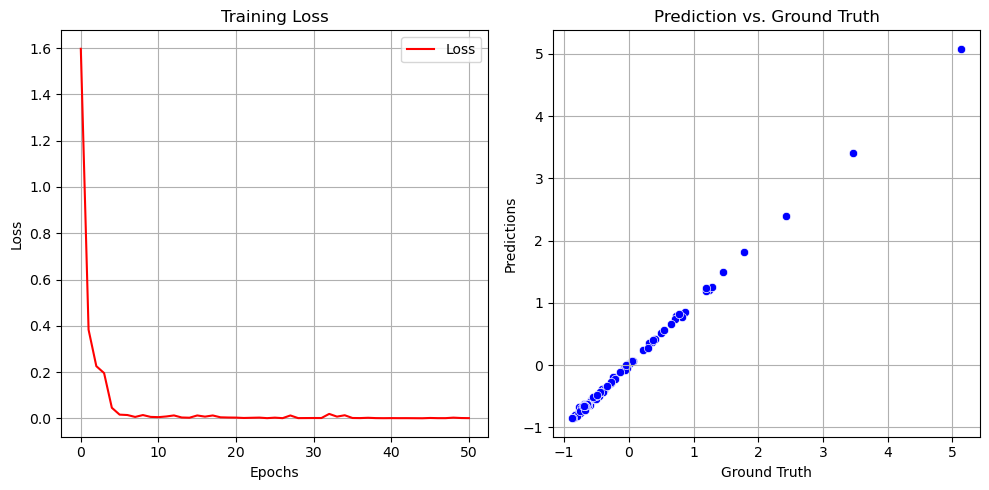

In [57]:
# Plot the training loop
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs+1), losses, label='Loss', color='r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_sample_task.flatten(), y=y_pred.flatten(), color='b')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Prediction vs. Ground Truth')
plt.grid()
plt.tight_layout()
plt.show()

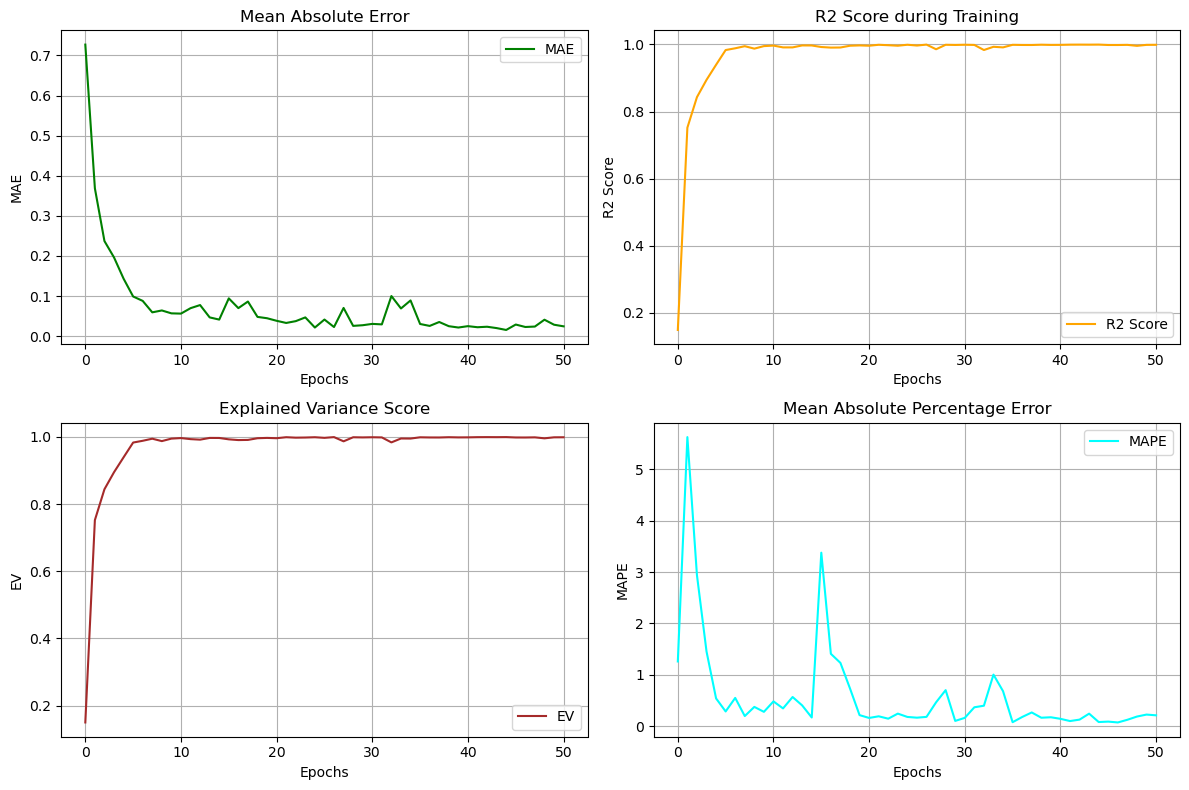

In [56]:
plt.figure(figsize=(12, 8))

# MAE
plt.subplot(2, 2, 1)
sns.lineplot(x=range(num_epochs+1), y=mae_scores, label='MAE', color='green')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Mean Absolute Error')
plt.grid()
plt.legend()

# R2
plt.subplot(2, 2, 2)
plt.plot(range(num_epochs+1), r2_scores, label='R2 Score', color='orange')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.title('R2 Score during Training')
plt.legend()
plt.grid()

# EV
plt.subplot(2, 2, 3)
sns.lineplot(x=range(num_epochs+1), y=ev_scores, label='EV', color='brown')
plt.xlabel('Epochs')
plt.ylabel('EV')
plt.title('Explained Variance Score')
plt.grid()
plt.legend()

# MAPE
plt.subplot(2, 2, 4)
sns.lineplot(x=range(num_epochs+1), y=mape_scores, label='MAPE', color='cyan')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.title('Mean Absolute Percentage Error')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


## 5 Hidden Layers

In [ ]:
# Initialize network parameters
num_hidden_layers = 3
num_hidden_units = 64
num_classes = 1
num_feature = x.shape[1]

# Reset the tensorflow graph
tf.compat.v1.reset_default_graph()

# Define placeholders for input and output
X = tf.placeholder(tf.float32, shape=[None, num_feature])
Y = tf.placeholder(tf.float32, shape=[None, num_classes])

# Initialize model parameters for each layer
weights = [tf.Variable(tf.random_uniform([num_feature if i == 0 else num_hidden_units,
                                         num_hidden_units if i < num_hidden_layers else num_classes]))
           for i in range(num_hidden_layers + 1)]
biases = [tf.Variable(tf.random_uniform([num_hidden_units if i < num_hidden_layers else num_classes]))
          for i in range(num_hidden_layers + 1)]
# Perform feedforward operations for each layer
layer_outputs = [X]
for i in range(num_hidden_layers + 1):
    layer_input = layer_outputs[-1]
    layer_output = tf.matmul(layer_input, weights[i]) + biases[i]
    layer_output = tf.nn.tanh(layer_output) if i < num_hidden_layers else layer_output
    layer_outputs.append(layer_output)
# Output of the neural network
Yhat = layer_outputs[-1]

# Loss function and optimizer
loss_function = tf.reduce_mean(tf.square(Yhat - Y))
optimizer = tf.train.AdamOptimizer(1e-2).minimize(loss_function)

# Initialize tensorflow variables
init = tf.global_variables_initializer()

# Training parameters
num_epochs = 50
num_samples = 100
num_tasks = 5
num_iterations = 10
mini_batch = 20
epsilon = 0.1  # Reptile update factor

### Training Loop

In [ ]:
# Initialize empty lists to store loss and R2 scores
losses = []
r2_scores = []
mae_scores = []
ev_scores = []
mape_scores = []

# Initialize phi (meta-parameters)
phi_init = None

# Number of reptile iterations
num_reptile_iterations = 10

# Training loop
with tf.Session() as sess:
    sess.run(init)
    
    for e in range(1, num_epochs+1):
        for _ in range(num_tasks):  # Iterate over a new set of tasks in each epoch
            task_indices = np.random.choice(len(x), size=num_samples, replace=False)
            x_sample_task = x[task_indices]
            y_sample_task = y[task_indices]

            # Reptile serial loop
            for reptile_iter in range(num_reptile_iterations):
                old_weights = sess.run(weights)
                old_biases = sess.run(biases)

                for _ in range(num_iterations):
                    for i in range(0, num_samples, mini_batch):
                        x_minibatch = x_sample_task[i:i+mini_batch]
                        y_minibatch = y_sample_task[i:i+mini_batch]
                        sess.run(optimizer, feed_dict={X: x_minibatch, Y: y_minibatch})

                new_weights = sess.run(weights)
                new_biases = sess.run(biases)

                # Perform meta update
                for i in range(len(weights)):
                    updated_weights = old_weights[i] + epsilon * (new_weights[i] - old_weights[i])
                    updated_biases = old_biases[i] + epsilon * (new_biases[i] - old_biases[i])
                    sess.run(weights[i].assign(updated_weights))
                    sess.run(biases[i].assign(updated_biases))

            # Compute loss and evaluation metrics
            loss = sess.run(loss_function, feed_dict={X: x_sample_task, Y: y_sample_task})
            losses.append(loss)

            y_pred = sess.run(Yhat, feed_dict={X: x_sample_task})
            r2 = r2_score(y_sample_task, y_pred)
            mae = mean_absolute_error(y_sample_task, y_pred)
            ev = explained_variance_score(y_sample_task, y_pred)
            mape = mean_absolute_percentage_error(y_sample_task, y_pred)

            r2_scores.append(r2)
            mae_scores.append(mae)
            ev_scores.append(ev)
            mape_scores.append(mape)

        if e % 10 == 0:
            print("Epoch {}: Loss {}, R2 Score {}  MAE {}, EV {}, MAPE {}\n".format(e, loss, r2, mae, ev, mape))
            print('---------------------------------\n')

In [63]:
# Initialize network parameters
num_hidden_layers = 5
num_hidden_units = 10
num_classes = 1
num_feature = x.shape[1]

# Reset the tensorflow graph
tf.compat.v1.reset_default_graph()

# Define placeholders for input and output
X = tf.placeholder(tf.float32, shape=[None, num_feature])
Y = tf.placeholder(tf.float32, shape=[None, num_classes])

# Initialize model parameters for each layer
weights = [tf.Variable(tf.random_uniform([num_feature if i == 0 else num_hidden_units,
                                         num_hidden_units if i < num_hidden_layers else num_classes]))
           for i in range(num_hidden_layers + 1)]
biases = [tf.Variable(tf.random_uniform([num_hidden_units if i < num_hidden_layers else num_classes]))
          for i in range(num_hidden_layers + 1)]

# Perform feedforward operations for each layer
layer_outputs = [X]
for i in range(num_hidden_layers + 1):
    layer_input = layer_outputs[-1]
    layer_output = tf.matmul(layer_input, weights[i]) + biases[i]
    layer_output = tf.nn.tanh(layer_output) if i < num_hidden_layers else layer_output
    layer_outputs.append(layer_output)

# Output of the neural network
Yhat = layer_outputs[-1]

# Loss function and optimizer
loss_function = tf.reduce_mean(tf.square(Yhat - Y))
optimizer = tf.train.AdamOptimizer(1e-2).minimize(loss_function)

# Initialize tensorflow variables
init = tf.global_variables_initializer()

# Training parameters
num_epochs = 50
num_samples = 100
num_tasks = 5
num_iterations = 10
mini_batch = 20
epsilon = 0.1  # Reptile update factor

### Training Loop

In [ ]:
# Initialize empty lists to store loss and R2 scores
losses = []
r2_scores = []
r2_scores = []
mae_scores = []
ev_scores = []
mape_scores = []

# Initialize phi (meta-parameters)
phi_init = None

# Training loop
with tf.Session() as sess:
    sess.run(init)
    
    for e in range(num_epochs+1):
        for _ in range(num_tasks+1):  # Iterate over a new set of tasks in each epoch
            # Sample a new task batch (τ1, τ2, ..., τn)
            task_indices = np.random.choice(len(x), size=num_samples, replace=False)
            x_sample_task = x[task_indices]
            y_sample_task = y[task_indices]
            
            # Randomly initialize weights (w) for each task
            weights_task = [tf.Variable(tf.random_uniform([num_feature if i == 0 else num_hidden_units,
                                                           num_hidden_units if i < num_hidden_layers else num_classes]))
                            for i in range(num_hidden_layers + 1)]
            biases_task = [tf.Variable(tf.random_uniform([num_hidden_units if i < num_hidden_layers else num_classes]))
                           for i in range(num_hidden_layers + 1)]
            sess.run(tf.variables_initializer(weights_task + biases_task))
            
            # Inner loop for gradient updates on tasks
            for k in range(num_iterations):
                for i in range(0, num_samples, mini_batch):
                    x_minibatch = x_sample_task[i:i+mini_batch]
                    y_minibatch = y_sample_task[i:i+mini_batch]
                    sess.run(optimizer, feed_dict={X: x_minibatch, Y: y_minibatch})
            
            # Get the updated weights (w) after SGD on the task
            w_updated = sess.run(weights_task + biases_task)
            
            # Update phi using Reptile update rule
            if phi_init is None:
                phi_init = w_updated  # Initialize phi on the first iteration
            else:
                for i in range(len(phi_init)):
                    phi_init[i] += epsilon * (w_updated[i] - phi_init[i])

        loss = sess.run(loss_function, feed_dict={X: x_sample_task, Y: y_sample_task})
        losses.append(loss)
      
        y_pred = sess.run(Yhat, feed_dict={X: x_sample_task})
        r2 = r2_score(y_sample_task, y_pred)
        mae = mean_absolute_error(y_sample_task, y_pred)
        ev = explained_variance_score(y_sample_task, y_pred)
        mape = mean_absolute_percentage_error(y_sample_task, y_pred)

        r2_scores.append(r2)
        mae_scores.append(mae)
        ev_scores.append(ev)
        mape_scores.append(mape)
        
        if e % 10 == 0:
            print("Epoch {}: Loss {}, R2 Score {}  MAE {}, EV {}, MAPE {}\n".format(e, loss, r2, mae, ev, mape))
            print('---------------------------------\n')


### Visualizations

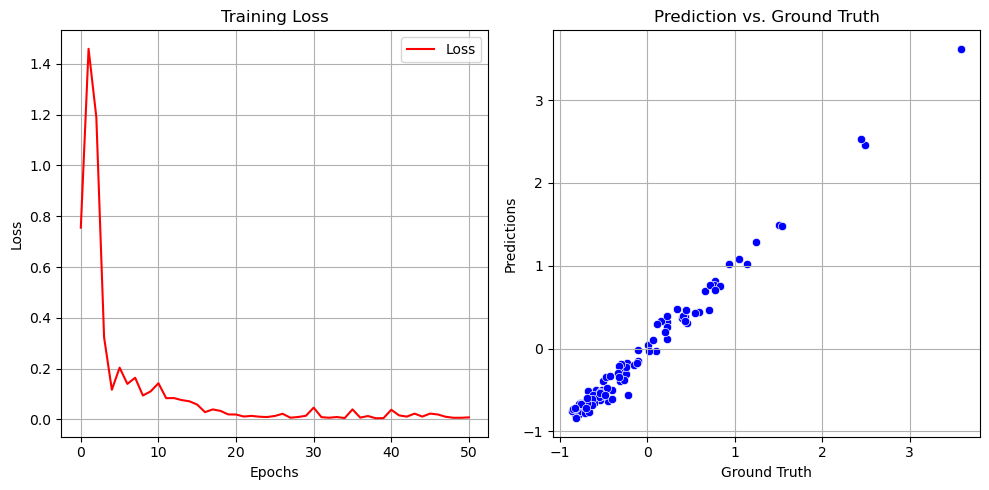

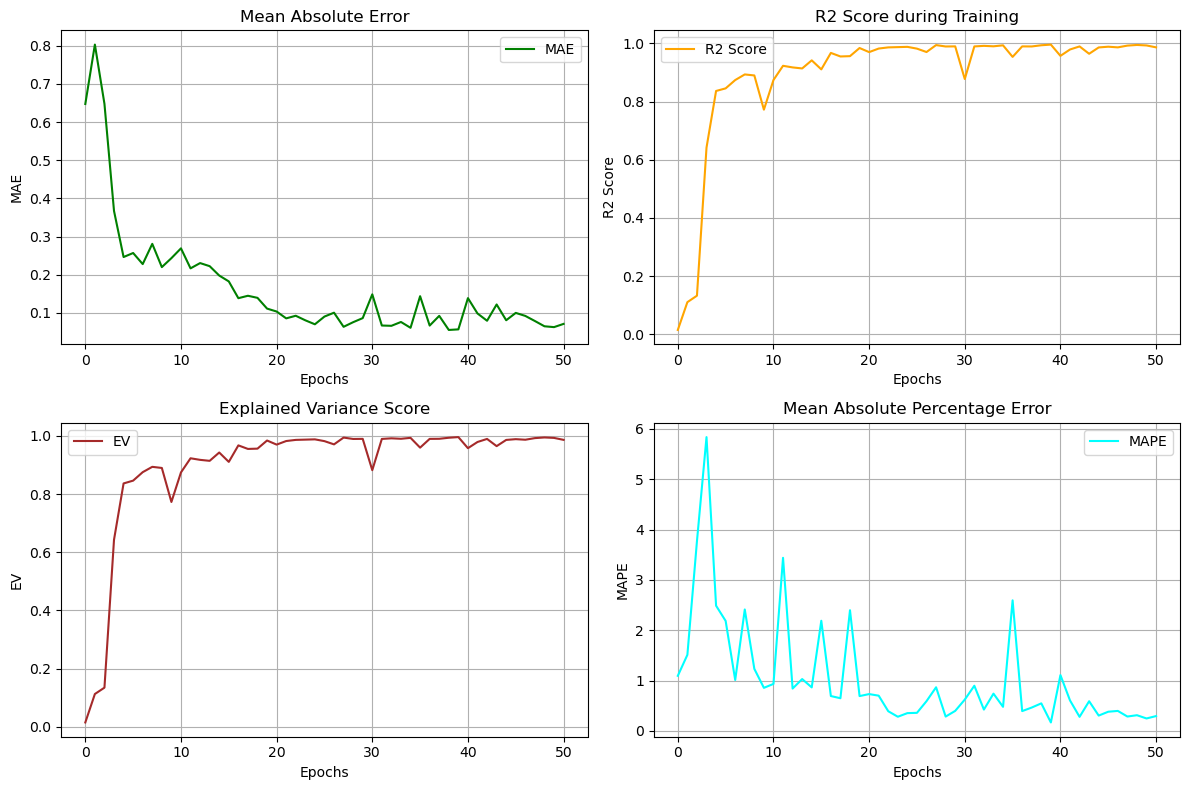

In [60]:
# Plot the training loop
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs+1), losses, label='Loss', color='r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_sample_task.flatten(), y=y_pred.flatten(), color='b')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Prediction vs. Ground Truth')
plt.grid()
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 8))

# MAE
plt.subplot(2, 2, 1)
sns.lineplot(x=range(num_epochs+1), y=mae_scores, label='MAE', color='green')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Mean Absolute Error')
plt.grid()
plt.legend()

# R2
plt.subplot(2, 2, 2)
plt.plot(range(num_epochs+1), r2_scores, label='R2 Score', color='orange')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.title('R2 Score during Training')
plt.legend()
plt.grid()

# EV
plt.subplot(2, 2, 3)
sns.lineplot(x=range(num_epochs+1), y=ev_scores, label='EV', color='brown')
plt.xlabel('Epochs')
plt.ylabel('EV')
plt.title('Explained Variance Score')
plt.grid()
plt.legend()

# MAPE
plt.subplot(2, 2, 4)
sns.lineplot(x=range(num_epochs+1), y=mape_scores, label='MAPE', color='cyan')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.title('Mean Absolute Percentage Error')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:

# # Define the network architecture
# num_hidden_layers = 3
# num_hidden_units = 10
# num_classes = 1
# num_feature = x.shape[1]

# # Reset the TensorFlow graph
# tf.compat.v1.reset_default_graph()

# # Define placeholders for input and output
# X = tf.placeholder(tf.float32, shape=[None, num_feature])
# Y = tf.placeholder(tf.float32, shape=[None, num_classes])

# # Initialize model parameters for each layer
# weights = [tf.Variable(tf.random_uniform([num_feature if i == 0 else num_hidden_units,
#                                          num_hidden_units if i < num_hidden_layers else num_classes]))
#            for i in range(num_hidden_layers + 1)]
# biases = [tf.Variable(tf.random_uniform([num_hidden_units if i < num_hidden_layers else num_classes]))
#           for i in range(num_hidden_layers + 1)]

# # Perform feedforward operations for each layer
# layer_outputs = [X]
# for i in range(num_hidden_layers + 1):
#     layer_input = layer_outputs[-1]
#     layer_output = tf.matmul(layer_input, weights[i]) + biases[i]
#     layer_output = tf.nn.tanh(layer_output) if i < num_hidden_layers else layer_output
#     layer_outputs.append(layer_output)

# # Output of the neural network
# Yhat = layer_outputs[-1]

# # Loss function and optimizer
# loss_function = tf.reduce_mean(tf.square(Yhat - Y))
# optimizer = tf.train.AdamOptimizer(1e-2).minimize(loss_function)

# # Initialize TensorFlow variables
# init = tf.global_variables_initializer()

# # Training parameters
# num_epochs = 50
# num_samples = 100
# num_tasks = 5
# num_iterations = 10
# mini_batch = 20
# epsilon = 0.1  # Reptile update factor

# # Initialize empty lists to store loss and scores
# losses = []
# r2_scores = []
# mae_scores = []
# ev_scores = []
# mape_scores = []

# # Training loop for Reptile
# with tf.Session() as sess:
#     sess.run(init)
    
#     for e in range(num_epochs+1):
#         for _ in range(num_tasks):  # Iterate over a new set of tasks in each epoch
#             # Sample a new task batch (τ1, τ2, ..., τn)
#             task_indices = np.random.choice(len(x), size=num_samples, replace=False)
#             x_sample_task = x[task_indices]
#             y_sample_task = y[task_indices]
            
#             # Inner loop for gradient updates on tasks
#             for _ in range(num_iterations):
#                 for i in range(0, num_samples, mini_batch):
#                     x_minibatch = x_sample_task[i:i+mini_batch]
#                     y_minibatch = y_sample_task[i:i+mini_batch]
#                     sess.run(optimizer, feed_dict={X: x_minibatch, Y: y_minibatch})
            
#             # Get the updated weights (w) after SGD on the task
#             w_updated = sess.run(weights + biases)
            
#             # Update meta-parameters using Reptile update rule
#             if e == 0:
#                 phi_init = w_updated  # Initialize phi on the first iteration
#             else:
#                 for i in range(len(phi_init)):
#                     phi_init[i] += epsilon * (w_updated[i] - phi_init[i])

#         loss = sess.run(loss_function, feed_dict={X: x_sample_taskzzz, Y: y_sample_task})
#         losses.append(loss)
      
#         y_pred = sess.run(Yhat, feed_dict={X: x_sample_task})
#         r2 = r2_score(y_sample_task, y_pred)
#         mae = mean_absolute_error(y_sample_task, y_pred)
#         ev = explained_variance_score(y_sample_task, y_pred)
#         mape = mean_absolute_percentage_error(y_sample_task, y_pred)

#         r2_scores.append(r2)
#         mae_scores.append(mae)
#         ev_scores.append(ev)
#         mape_scores.append(mape)
        
#         if e % 10 == 0:
#             print("Epoch {}: Loss {}, R2 Score {}  MAE {}, EV {}, MAPE {}\n".format(e, loss, r2, mae, ev, mape))
#             print('---------------------------------\n')
